In [211]:
import cv2
import pytesseract
import random
import os
from matplotlib import pyplot as plt
filelist = [ f for f in os.listdir("letterimages_test") if f.endswith(".jpg") ]
for f in filelist:
    os.remove(os.path.join("letterimages_test", f))
img = cv2.imread('letters.jpg')
img = cv2.resize(img, (1000,400))
hImg, wImg, c = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    alpha_num = b[0]
    name = r"letterimages_test/"+alpha_num+".jpg"
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    thresh = 2
    crop_img = img[hImg - h-thresh:hImg - y,x-thresh:w]
    resize_y = int(random.uniform(45, 60))
    resize_x = int(random.uniform(35, 45))
    crop_img = cv2.resize(crop_img, (resize_x,resize_y))
    count = 0
    while os.path.isfile(name):
#         name = name[:-(4+count)]
        count +=1
        temp = alpha_num+"_"+str(count)
        name = r"letterimages_test/"+temp+".jpg"
    plt.imsave(name,crop_img) 

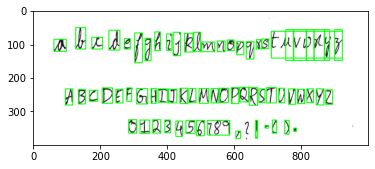

In [202]:
img = cv2.imread('letters.jpg')
img = cv2.resize(img, (1000,400))
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
plt.imshow(img)

In [206]:
# img = cv2.imread('letterimages_test/t1.jpg')
# # img = cv2.resize(img, (1000,400))
# h, w, c = img.shape
# boxes = pytesseract.image_to_boxes(img)
# for b in boxes.splitlines():
#     b = b.split(' ')
#     img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
# plt.imshow(img)

In [203]:
# plt.imshow(crop_img)
crop_img

array([[[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        [255, 255, 255],
        [249, 249, 249],
        [255, 255, 255],
        [246, 246, 246],
        [252, 252, 252],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [248, 248, 248],
        [255, 255, 255],
        [248, 248, 248],
        [252, 252, 252],
        [251, 251, 251],
        [254, 254, 254],
        [248, 248, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [252, 252, 252],
        [248, 248, 248],
        [246, 246, 246],
        [199, 199, 199],
        [110, 110, 110],
        [118, 118, 118],
        [246, 246, 246]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        [253, 253, 253],
        [248, 248, 248],
        [ 98,  98,  98],
        [ 87,  87,  87],
        [ 41,  41,  41],
        [ 49,  49,  49],
        [161, 161, 

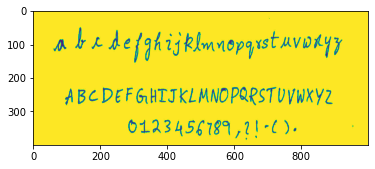

In [204]:

plt.imshow(gray)

2


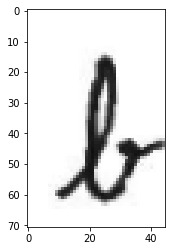

In [53]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math
import random
import copy

def warpAffine(src, M, dsize, from_bounding_box_only=False):
    """
    Applies cv2 warpAffine, marking transparency if bounding box only
    The last of the 4 channels is merely a marker. It does not specify opacity in the usual way.
    """
    return cv2.warpAffine(src, M, dsize,borderValue=(255,255,255))
def rotate_image(image, angle):
    """Rotate the image counterclockwise.
    Rotate the image such that the rotated image is enclosed inside the
    tightest rectangle. The area not occupied by the pixels of the original
    image is colored black.
    Parameters
    ----------
    image : numpy.ndarray
        numpy image
    angle : float
        angle by which the image is to be rotated. Positive angle is
        counterclockwise.
    Returns
    -------
    numpy.ndarray
        Rotated Image
    """
    # get dims, find center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    image = warpAffine(image, M, (nW, nH), False)

    # image = cv2.resize(image, (w,h))

    return image
image = cv2.imread(r"letterimages\b.png")
rand_angle = int(random.uniform(-15, 15))
print(rand_angle)
image = rotate_image(image,rand_angle)
plt.imshow(image)